In [1]:
import pandas as pd
from funcoes_datasus import limpa_dados, tranforma_date, plot_grafico_linha
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_csv("C:/Users/pedro/Documents/projeto_modulo_1_bootcamp2_alura/dados_brutos/A155732189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    na_values='-',
                    thousands=".", decimal=",", engine="python")

In [3]:
ipca = pd.read_excel("C:/Users/pedro/Documents/projeto_modulo_1_bootcamp2_alura/dados_brutos/ipca_202104SerieHist.xls", skiprows=7, usecols=[0,1,2])

In [4]:
pd.set_option('display.max_rows', 500)
ipca.columns=['Ano', 'Mês', 'ipca_93']
ano_atual = ipca['Ano'][0]
for i in range(len(ipca['Ano'])):
    try:
        ano_atual=int(ipca['Ano'][i])
    except:
        ipca['Ano'][i] = ano_atual
    try:
        ip = int(ipca['ipca_93'][i])
    except:
        ipca = ipca.drop(i)

ipca

,Ano,Mês,ipca_93
0,1994,JAN,141.31
1,1994,FEV,198.22
2,1994,MAR,282.96
3,1994,ABR,403.73
4,1994,MAI,581.49
5,1994,JUN,857.29
6,1994,JUL,915.93
7,1994,AGO,932.97
8,1994,SET,947.24
9,1994,OUT,972.06


In [5]:
ipca = ipca[(ipca['Ano'] >= 2008) & (ipca['Ano'] <= 2019)]

In [6]:
ipca['ipca_93'] = ipca['ipca_93']/ipca['ipca_93'].iloc[-1] 

In [7]:
ipca['data'] = tranforma_date(ipca['Ano'].astype(str) +'/'+ ipca['Mês'].str.capitalize())

In [8]:
ipca = ipca.drop(columns=['Ano', 'Mês'])
ipca

,ipca_93,data
198,0.516211,2008-01-01
199,0.518741,2008-02-01
200,0.521231,2008-03-01
201,0.524098,2008-04-01
202,0.528238,2008-05-01
203,0.532148,2008-06-01
204,0.534967,2008-07-01
205,0.536465,2008-08-01
206,0.53786,2008-09-01
207,0.540281,2008-10-01


In [9]:
dados=limpa_dados(dados, 'valor_hospitalar')

In [10]:
dados

,UF,regiao,data,valor_hospitalar
0,Rondônia,Norte,2008-02-01,1508433.27
1,Acre,Norte,2008-02-01,1328906.03
2,Amazonas,Norte,2008-02-01,6091900.71
3,Roraima,Norte,2008-02-01,553109.78
4,Pará,Norte,2008-02-01,15560635.68
...,...,...,...,...
3856,Rio Grande do Sul,Sul,2019-12-01,73101077.99
3857,Mato Grosso do Sul,Centro-Oeste,2019-12-01,14069249.93
3858,Mato Grosso,Centro-Oeste,2019-12-01,11056911.79
3859,Goiás,Centro-Oeste,2019-12-01,27540422.46


In [11]:
dados = dados.merge(ipca, on='data')
dados['valor_corrigido'] =dados['valor_hospitalar'] / dados['ipca_93']
dados['valor_corrigido'] = dados['valor_corrigido'].astype('float64')

In [12]:
dados=dados.drop(columns='ipca_93')

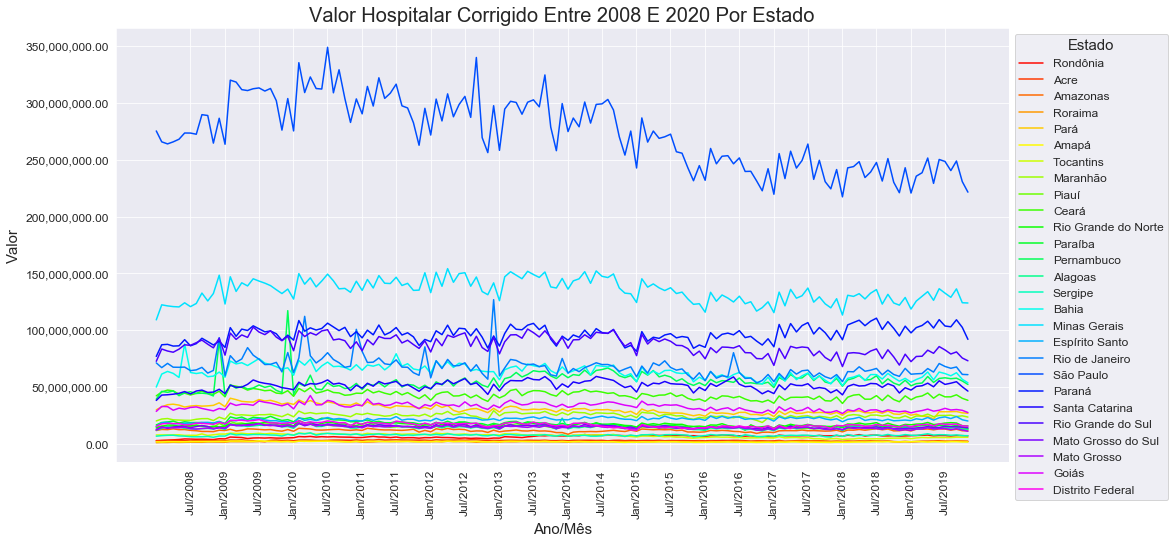

In [13]:
plot_grafico_linha(dados, y='valor_corrigido', title='Valor Hospitalar Corrigido Entre 2008 E 2020 Por Estado', legend_title='Estado', ylabel='Valor')

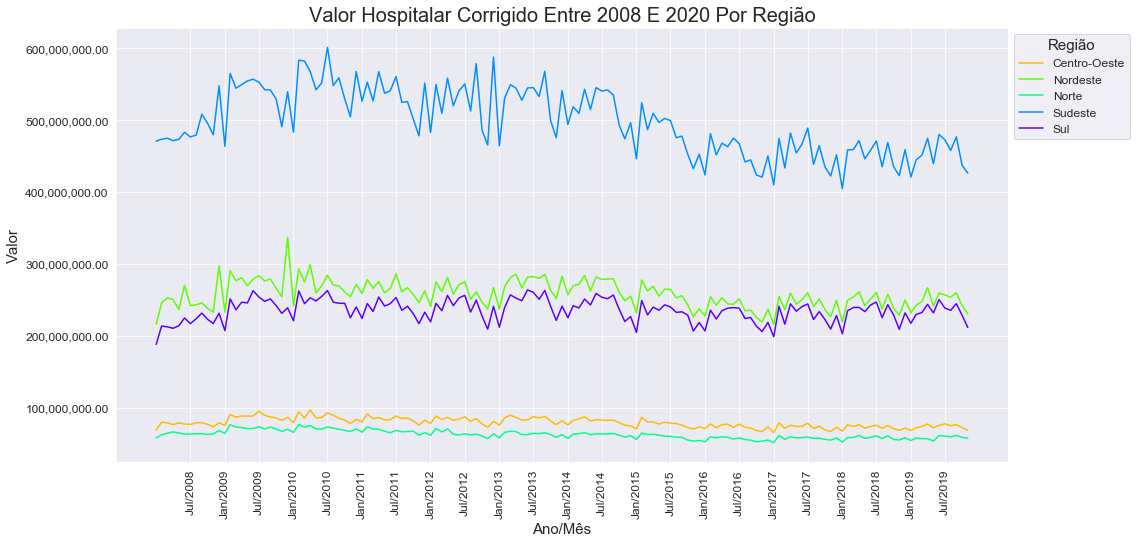

In [14]:
plot_grafico_linha(dados.groupby(['regiao', 'data']).sum().reset_index(), y='valor_corrigido', hue='regiao', 
                   title='Valor Hospitalar Corrigido Entre 2008 E 2020 Por Região', legend_title='Região', ylabel='Valor')

In [15]:
#Salvando os dados limpos no diretório
dados.to_csv("C:/Users/pedro/Documents/projeto_modulo_1_bootcamp2_alura/dados_limpos/valor_hospitalar.csv")